# **[11] 깊은 인공신경망 Deep Neural Network (DNN)**

**[학습 목표]**
1. DNN의 구성 요소와 연산 방법을 이해할 수 있다.
2. DNN을 활용하여 개와 고양이 울음소리를 구분해볼 수 있다.

## **2. 깊은 인공신경망 실습**  

개와 고양이의 울음 소리를 디지털 오디오 데이터로 저장해두었습니다.  
울음 소리로 개와 고양이를 분류하는 DNN을 학습해 보아요.

### **(1) 데이터 시각화**  


(262395,) 22050


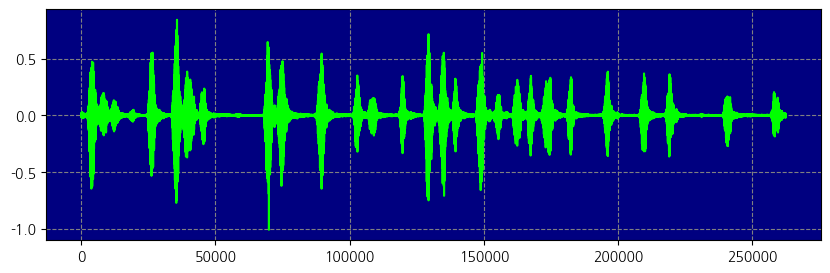

AttributeError: module 'matplotlib' has no attribute 'pyplot'

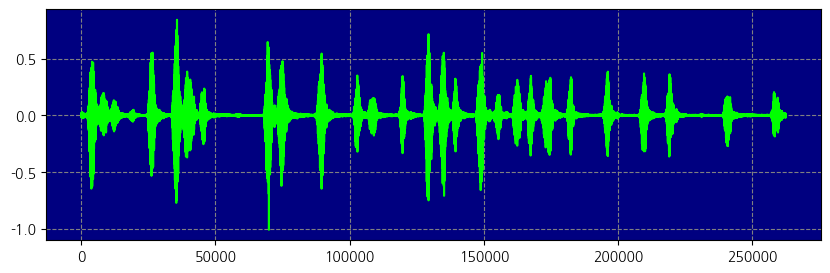

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [1]:
import os
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt

example = './cats_dogs/train/dog/dog_barking_2.wav'
x, sr = librosa.load(example)

print(x.shape, sr)

plt.figure(figsize=(10, 3), linewidth=0)
plt.axes(facecolor='navy')
plt.plot(x, 'lime')
plt.grid(axis='x', color='gray', linestyle='--')
plt.grid(axis='y', color='gray', linestyle='--')
plt.show()

In [3]:
data = []
label = []
flength = 4096
for dirname, _, filenames in os.walk('./cats_dogs/train'):
    for filename in filenames:
        x, sr = librosa.load(os.path.join(dirname, filename))
        lowrise_s_x = x[::4]
        for i in range(0, len(lowrise_s_x), flength):
            if i+flength > len(lowrise_s_x):
                data.append(np.array(x[-flength:]))
            else:
                data.append(x[i:i+flength])
            label.append(dirname[-3:])

### **(2) DNN 학습**  


In [5]:
import random                        # for generating random numbers
from keras.models import Sequential  # Model type to be used
from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

2023-07-20 17:06:55.347413: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ModuleNotFoundError: No module named 'keras.layers.core'

In [ ]:
data = np.array(data).astype('float32')
label_binary = np.array([1 if x == 'dog' else 0 for x in label])

In [ ]:
from sklearn.model_selection import train_test_split
# train, test 데이터로 나누어보기
X_train , X_test , y_train , y_test = \
train_test_split(data, label_binary, test_size=0.1,  random_state=1, stratify=label_binary)

In [ ]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)

In [ ]:
from keras import regularizers
regularizer = 0.001

In [ ]:
# The Sequential model is a linear stack of layers and is very common.

model = Sequential()

model.add(Dense(512, kernel_regularizer=regularizers.l2(regularizer), input_shape=(4096,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(512, kernel_regularizer=regularizers.l2(regularizer)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(2))

model.add(Activation('softmax'))

model.summary()

In [ ]:
# Let's use the Adam optimizer for learning
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train,
          batch_size=16, epochs=10,
          verbose=1)

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

### **(3) DNN 평가**  


In [6]:
test_data = []
test_file = []
test_label = []
flength = 4096
for dirname, _, filenames in os.walk('./cats_dogs/test'):
    for filename in filenames:
        x, sr = librosa.load(os.path.join(dirname, filename))
        lowrise_s_x = x[::4]
        for i in range(0, len(lowrise_s_x), flength):
            if i+flength > len(lowrise_s_x):
                test_data.append(np.array(x[-flength:]))
            else:
                test_data.append(x[i:i+flength])
            test_label.append(dirname[-3:])
            test_file.append(filename)

In [ ]:
test_data = np.array(test_data).astype('float32')
test_label_binary = np.array([1 if x == 'dog' else 0 for x in test_label])

In [ ]:
test_result = model.evaluate(test_data, test_label_binary)